In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

### Loading crime data.

In [2]:
import pandas as pd

In [3]:
crime_data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

#A column containg the data as a Datetime object is added
crime_data['Date1'] = pd.to_datetime(crime_data['Date']) 

# Part 1

##  A: Questions to text and lectures.

- **What is the Oxford English Dictionary's defintion of a narrative?**<br>
"The Oxford English Dictionary defines narrative as “an account of a series of events, facts, etc.,given in order and with the establishing of connections between them."" <br>
From Narrative Visualization: Telling Stories with Data by Edward Segel and Jeffrey Heer, p.1.

- **What is your favorite visualization among the examples in section 3? Explain why in a few words.**<br>
My favorite is the Fig.1 "Steroids or Not, the Pursuit is On". <br>Compared with others, more elements are integrated in one page, but they are connected in a clear and easy to follow path. This is done through the successful use of visual highlighting (color, size, boldness) and connecting elements such as arrows and shaded trails. <br>
Another reason is that the hierarchy of this one is clear. By using big size for the upper left part than the upper right part, we could easily distinguish the major part, from the bottom plots which are smaller and with less color.

- **What's the point of Figure 7?**<br>
In Figure 7 it is shown which design strategies have been applied in 58 visualizations. The point is then that it can bee observed which design strategies are often applied, or which are not very often applied. As also the genre of each example is listed, the figure also makes it possible to see if certain strategies appear to be applied often or avoid for different types of visualizations.

- **Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).**<br>
    - **Visual narrative:**<br>
         - Visual Structuring: Consistent Visual Platform.
         - Highlighting: Feature Distinction.
         - Transition Guidance: Object Continuity.<br>
 
    - **Narrative structure:**
        - Ordering: User Directed Path.
        - Interactivity: Filtering/Selection/Search.
        - Messaging: Captions/Headlines.



- **Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?**<br>
My favorite one is *Annotated Chart*, which is one of the most common ones and I would say the most basic one. An annotation is a necessary part of every chart, it can be used to either give a general description or emphasize key observations from the data. Annotations are helpful to enrich a narrative. Compared with other genres, for examples it is less complex in terms of the layouts of different objectives than poster and flow chart, it is more interactive than magazine style.Part of this preference might also be because it is one of the types of visualizations that I am most accustomed to.<br>
My least favorite genre of narrative visualization is *Comic Strip*. A comic strip tends to follow a strict linear path. If all pictures are in uniform style in color, size and caption, etc., it's fine to give display a narrative visualization, but if not, viewers are liable to lose the path to follow the story-telling. Usually we think the more important the part is, the bigger the picture it should be shown in. Therefore when using comic strip, we should consider more about how to balance the layout of the whole page and emphasis of the story itself.<br>

## Part B: Questions to talk on explanatory data visualization

- **What are the three key elements to keep in mind when you design an explanatory visualization?**<br>
    To keep in mind what it is you want to communicate, 2. Allow users to investigate data and 3. Who are you trying communcating with through your visualization

- **In the video I talk about (1) overview first, (2) zoom and filter, (3) details on demand.**
    - **Go online and find a visualization that follows these principles (don't use one from the video).**<br>
    The visualization that will be used here can be found at https://vizhub.healthdata.org/subnational/usal (29.3.2020)
    - **Explain how it does achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.**<br>
    ***Overview:***The visualization starts by giving an overview of the deaths pr. 100,000 population for each county in the US. Furthermore the visualization allow you the option to play a video to show how this have developed from 1980 to 2014.
   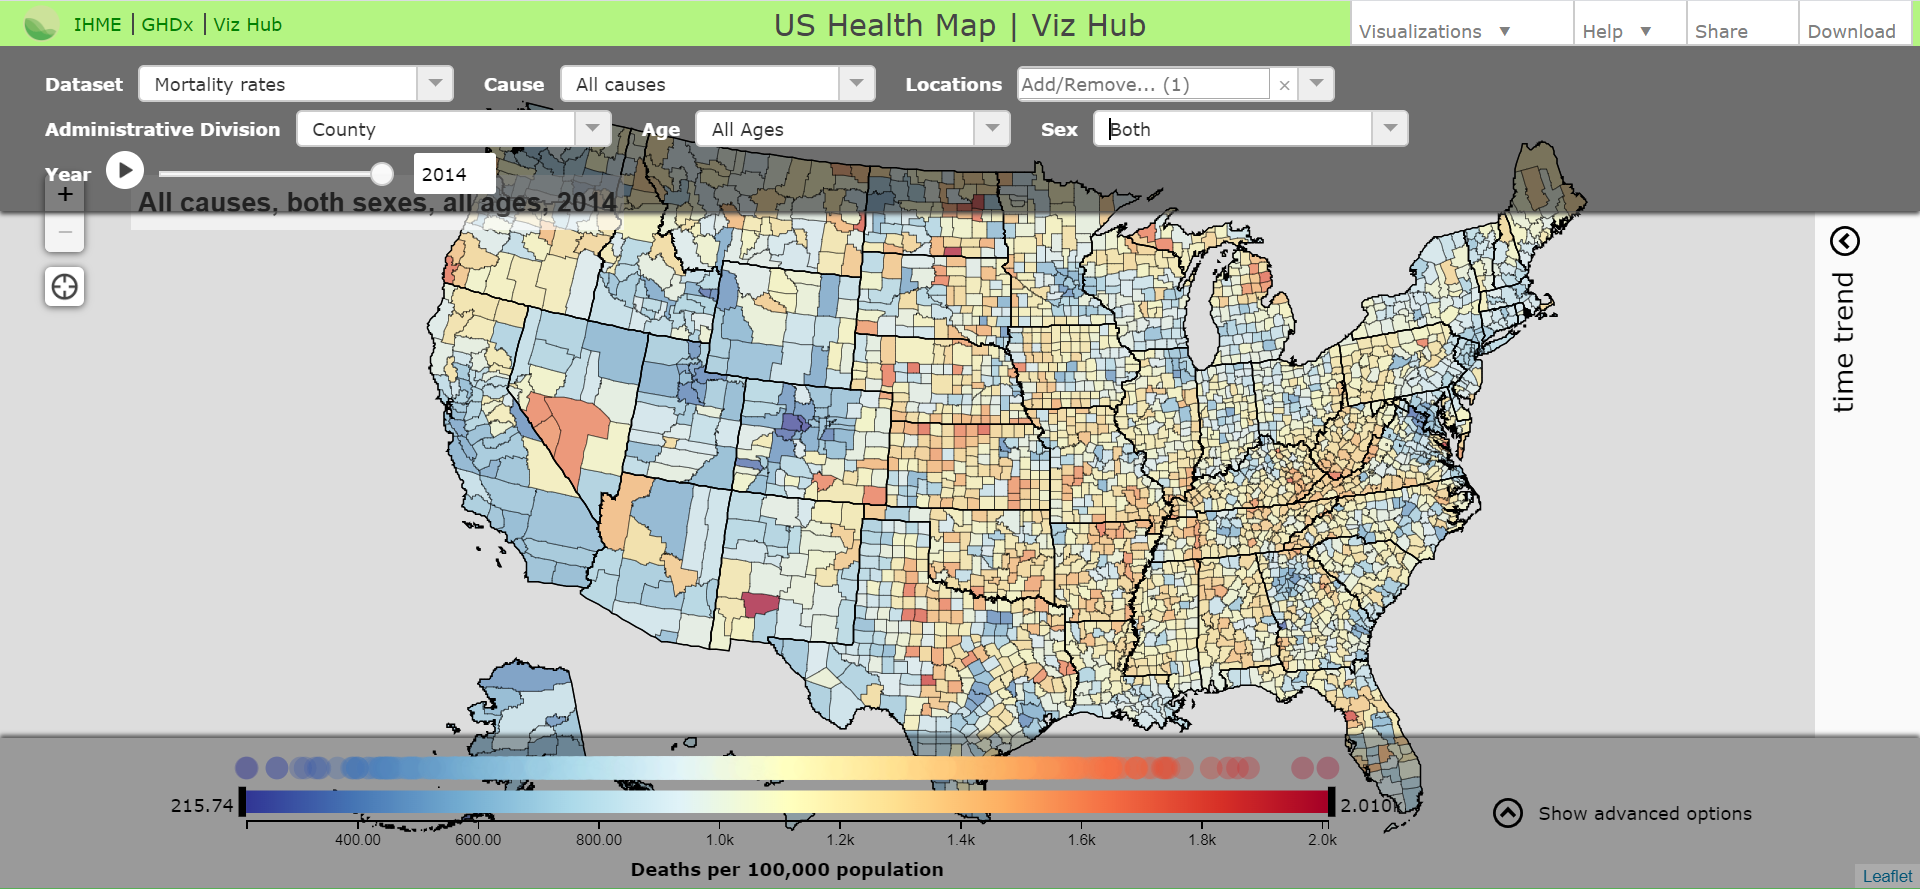


   ***zoom and filter:***  Now the map allow you to zoom in closer on any area you wish, but more importantly it also allow you to see the information displayed on a state level instead of county level.
    ***zoom and filter:***  Now the map allow you to zoom in closer on any area you wish, but more importantly it also allow you to see the information displayed on a state level instead of county level.
    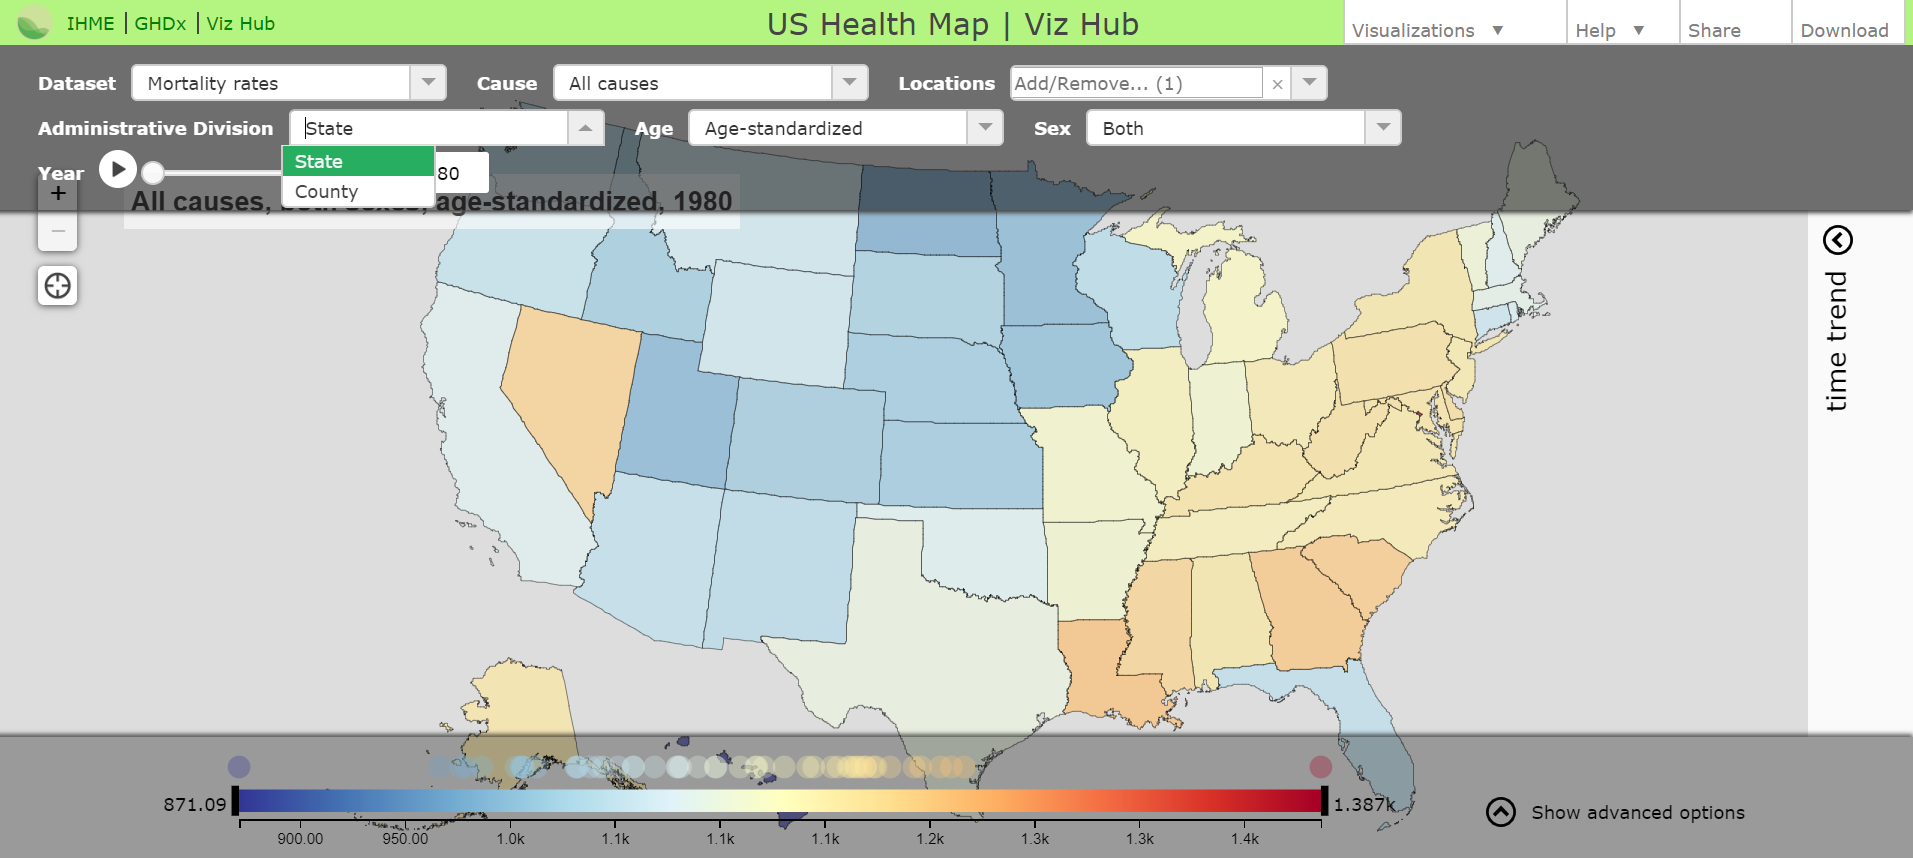


Furthermore the visualization allow you to filter based on specific years, gender and causes.
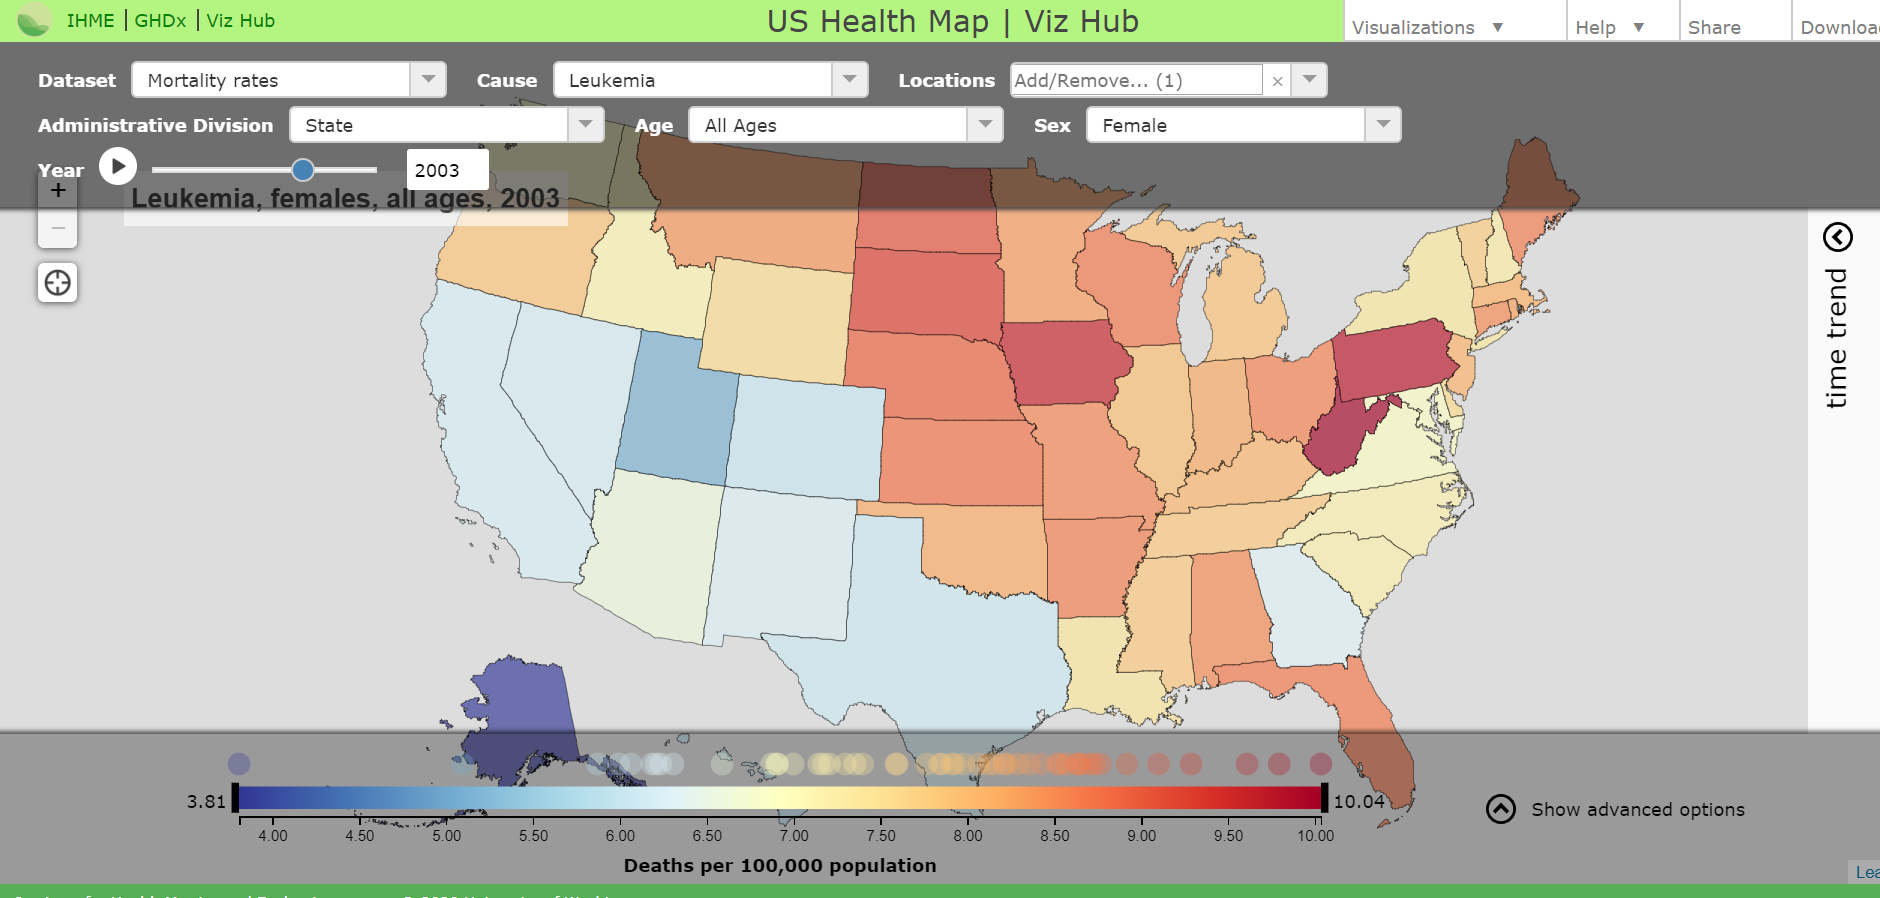

***Details on demand:*** Now when holding the cursor over a specific location of the map, the exact numbers are shown.
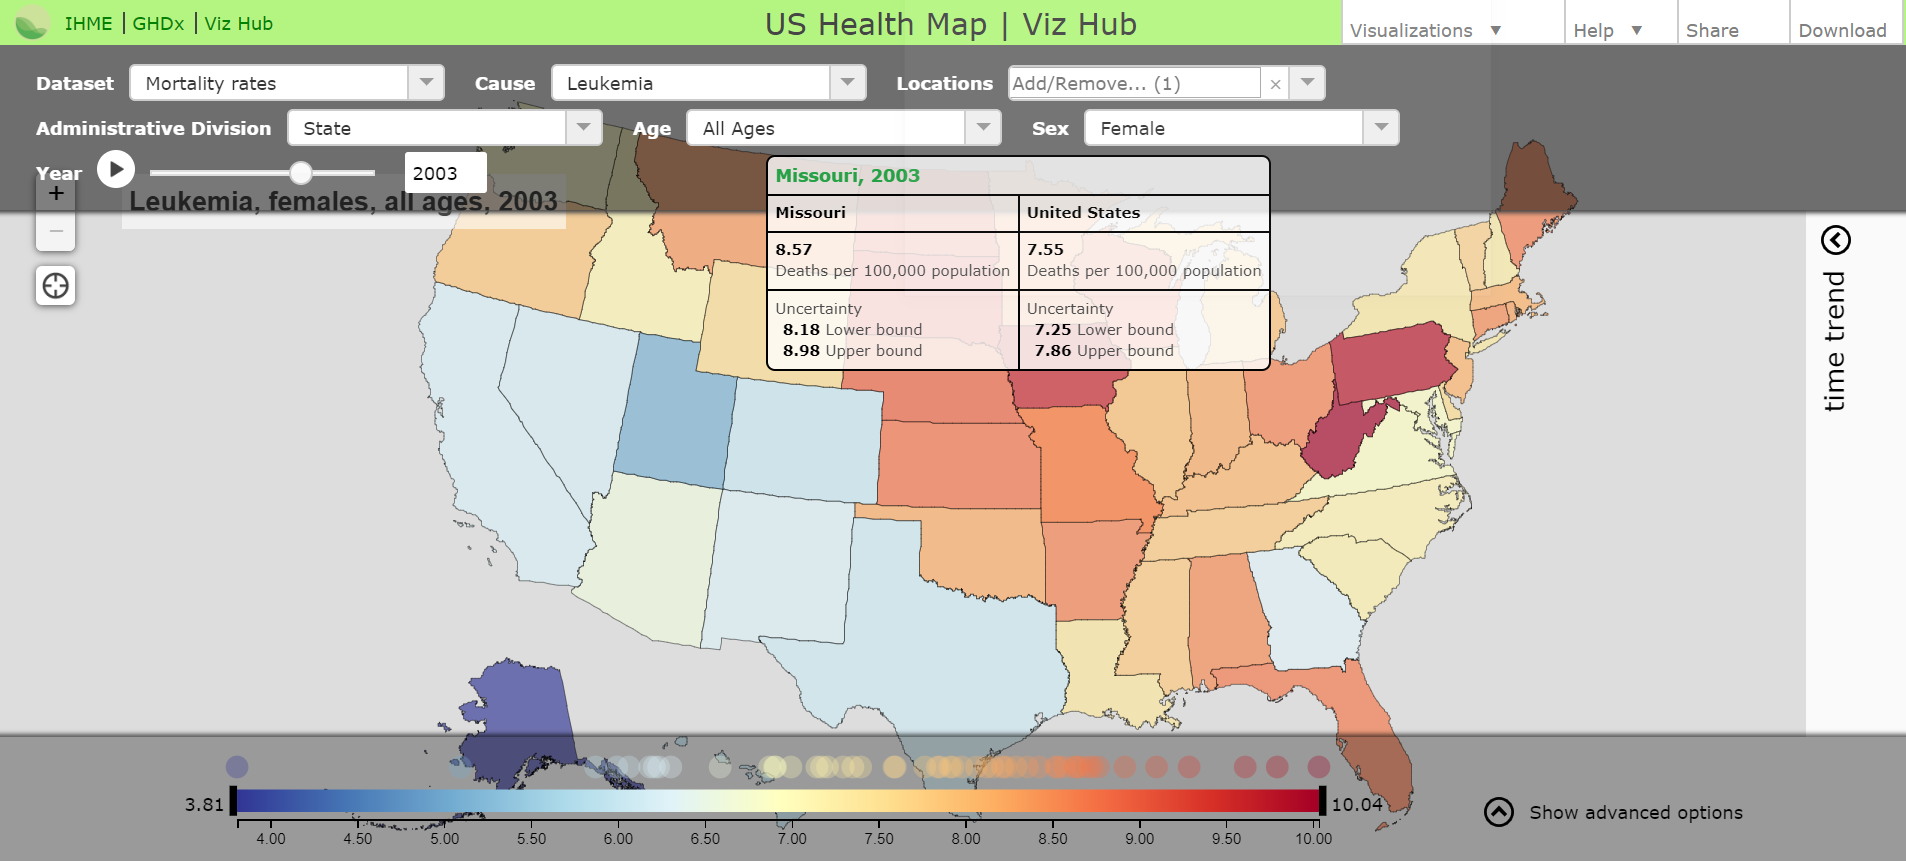

In addition to this, for the filters selected the development over time in the locations selected can be shown in more detailed graphs.
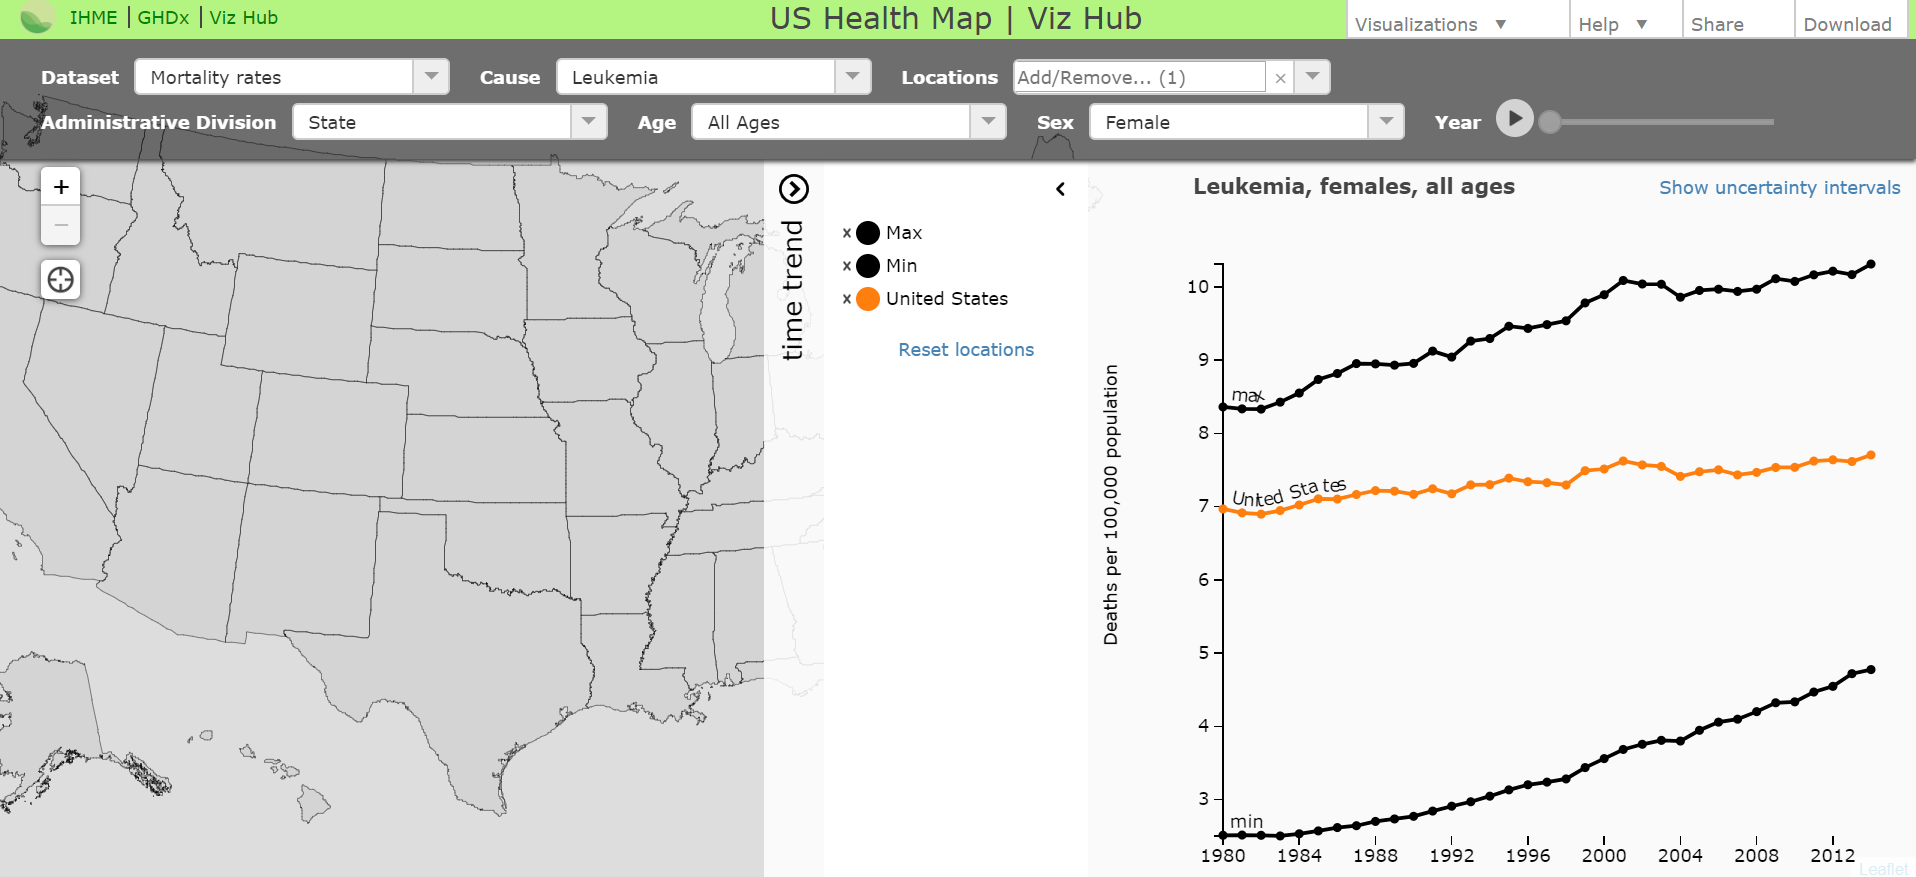

- **Explain in your own words: How is explanatory data analysis different from exploratory data analysis?**<br>
One main difference is in the audience towards who the visualization is directed. In a setting of exploratory data analysis the visualization is target towards the developer of the visualizations, this means that the viewer of the graph have alot of background information. However for explanatory data analysis the audiance does not posses the same degree of background infromation, and it is therefore important that it is very clear from the visualization what is being displayed. In explanatory data analysis it is furthermore important to try and tell a clear story with the data, where in exploratory data analysis this story is not known but is being discovered.

# Part 2: Random forest and weather

## Part 2A: Random forest binary classification

The two types of crimes we will be focusing on here is *fraud* and *theft*.

In [4]:
fraud = crime_data[crime_data.Category=='FRAUD']
theft = crime_data[crime_data.Category=='LARCENY/THEFT']
print("Number of fraud crimes: {}".format(len(fraud)))
print("Number of theft crimes: {}".format(len(theft)))

Number of fraud crimes: 41542
Number of theft crimes: 480448


Because there is such a large different in the number of occurences of the two crime types, we will start by balancing the data set. This is here done by downsampling the number of theft crimes.<br>
The following code is based on the example provided here: https://elitedatascience.com/imbalanced-classes

In [5]:
from sklearn.utils import resample

In [6]:
theft= resample(theft,replace=False,n_samples=len(fraud),random_state=123)
crime_data3 = pd.concat([theft, fraud])

The next step is to selct the desired features.The first features focus on the "where", where the following features will be included.<br>
- **police district**: This will be represented by using a one-hot encoding of *PdDistrict*, as there exist no hiracical relationship between different districts.
- **X**: the lattitude of the location of the crime. No transformation is applied.
- **Y**: The longitude of the location of the crime. No transformation is applied.

In [7]:
crime_data3=crime_data3.drop(['IncidntNum','Descript','Resolution','Address'],axis=1);

In [8]:
crime_data3=crime_data3.join(pd.get_dummies(crime_data3.PdDistrict))
crime_data3=crime_data3.drop(['PdDistrict','PdId','Location'],axis=1)


The second round of features focus on the "when", where the following features will be included.<br>
- **Month**: This is obtained from *Date* attribute.
- **Hour of the week**: This is obtained by combining the information from the *Time* and *Weekday* attributes of the original data set.

In [9]:
# adding month
crime_data3['Month']=pd.DatetimeIndex(crime_data3.Date1).month
crime_data3=crime_data3.drop(['Date'],axis=1)

In [10]:
# transform day of week to integer values where the order of days correspond to the order of indexes.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(days,range(len(days))))
crime_data3['DayOfWeek'] = crime_data3['DayOfWeek'].map(sorterIndex)+1
crime_data3['hourOfTheWeek'] = pd.to_datetime(crime_data3.Time).dt.hour+1 +24*crime_data3['DayOfWeek']
crime_data3=crime_data3.drop(['DayOfWeek'],axis=1)

The data set is now devided into a test and training set. The split is made using *train_test_split* from sklean where the data is set to be split so that the two classes will be distributed equally in both the train and test set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(crime_data3, crime_data3['Category'], test_size=0.3, random_state=0,stratify=crime_data3['Category'])

In [12]:
print("Number of training samples: {}".format(len(X_train)))
print("Number of testing samples: {}".format(len(X_test)))

Number of training samples: 37854
Number of testing samples: 24926


We are now ready to build the random classifier it self.<br>
The classifier is trained without cross-validation, as it is expected that the size of the data set is large enough that part of the data can be completely taken out as test data. The max_depth of the created trees are set to 25 to limit the trees in becomming to overfitted to the training data. However the metod itself should help prevent a large degree of overfitting.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RFClassifier = RandomForestClassifier(random_state=3,criterion="entropy",max_depth=25)
RFClassifier=RFClassifier.fit(X_train.drop(["Date1","Time","Category"],axis=1),y_train) 
# The date object it self is not used in the classefier but is preserved so it can be merged with the weather data.
print("accuracy: {:.2f}%".format(RFClassifier.score(X_test.drop(["Date1","Time","Category"],axis=1), y_test)*100))

accuracy: 60.13%


Based on the on the accuracy we can see that the randomforest-classifier does perform better than the baseline 50% describing random guessing. However it is also clear that it is not a very precis classifier, this could indicate that two crime types don't have very distinct spatio-temporal features.

## Part 2B: Info from weather features

We start by downloading the data.

In [15]:
import requests
file=requests.get('https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/Data_files/weather_data.csv')
open('weather_data.csv', 'wb').write(file.content)
weather_data=pd.read_csv("weather_data.csv")

The weather data contains the following features.

In [16]:
weather_data.columns

Index(['date', 'temperature', 'humidity', 'weather', 'wind_speed',
       'wind_direction', 'pressure'],
      dtype='object')

- **date:** The date information will be used to add the data to the correct crime observations. However any information concerning the time of the crime have already been included in the features selected from the crime data set.
- **temperature:** The temperature information will be keept, and since it is already given as decimal numbers no transformation will be applied.
- **humidity:** The humidity will also be included, as it might be an indication of how comfortable it is to be outside. No transformation will be apllied as it is listed as decimal numbers.  
- **weather:** The weather feature describe the overall weather and is therefor an essential feature. However the feature is categorical and will therefore be one-hot encoded.
- **wind_speed:** The wind speed will be included, without any form of transformation.  
- **wind_direction:** The wind speed direction will not be included as it does not seem likely to be connected to what type of crime that will be happening.
- **pressure:** The pressure is not expected to influence human behaviour and is therefore not included.

In [17]:
# transforming weather feature
weather_data=weather_data.join(pd.get_dummies(weather_data.weather))
weather_data=weather_data.drop(['weather','wind_direction','pressure'],axis=1)

The weather information is now added to the dataset.

In [18]:
#transformation so date and time information format match in both data frames.
weather_data['date']=pd.to_datetime(weather_data['date'])
weather_data['hour']=weather_data['date'].dt.hour
weather_data['date']=weather_data['date'].dt.date
X_test['Time']=pd.to_datetime(X_test.Time).dt.hour
X_test['Date1']=pd.to_datetime(X_test.Date1).dt.date
X_train['Time']=pd.to_datetime(X_train.Time).dt.hour
X_train['Date1']=pd.to_datetime(X_train.Date1).dt.date

#mergeing data
X_test=X_test.merge(weather_data, how='inner', left_on=["Date1", "Time"], right_on=["date","hour"])
y_test=X_test.Category
X_test=X_test.drop(['Time','hour','date','Date1','Category'],axis=1)
X_train=X_train.merge(weather_data, how='inner', left_on=["Date1", "Time"], right_on=["date","hour"])
y_train=X_train.Category
X_train=X_train.drop(['Time','hour','date','Date1','Category'],axis=1);

c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\clara\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

We will now just check the size of the training and test set, after the weather information have been added.

In [19]:
print("Number of training samples: {}".format(len(X_train)))
print("Number of test samples {}".format(len(X_test)))

Number of training samples: 14698
Number of test samples 9604


We are now ready to train our random forrest classifier with the additional weather features.

In [20]:
WeatherRFClassifier = RandomForestClassifier(random_state=3,criterion="entropy",max_depth=25)
WeatherRFClassifier=WeatherRFClassifier.fit(X_train,y_train) 
# The date object it self is not used in the classefier but is preserved so it can be merged with the weather data.
print("accuracy: {:.2f}%".format(WeatherRFClassifier.score(X_test, y_test)*100))

accuracy: 60.32%


We can see that the performance was only minimally improved by introducing the weather data, with the previous accuracy being 60.13%.<br> 
What this only very small performance increase indicate is that the weather does not affect the occurences of *theft* and *fraud* in very different ways, and it the information does therefor not appear paticularly usefuel when it comes to predicting or classifing crime types. However it is still possible that weather information could influence the overall crime activity, and therefore might be use for predicting number of expected crimes.<br>

# Part 3: Data visualization

In this part of the exercise the goal is to make an interactive visualization of the focus crimes in our crime dataset from 2010 to 2018. The first step is therefore to filter the data set.

In [21]:
crime_data2= crime_data[(crime_data.Date1.dt.year >= 2010) & (crime_data.Date1.dt.year <= 2018)]

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
crime_data2= crime_data2[(crime_data2.Category.isin(focuscrimes))] 

In this next step we count the number of occurences grouped by the hour of the day and the crime type.

In [22]:
crime_data2['New_Time'] = pd.to_datetime(crime_data2['Time']).dt.hour
crime_focus_count_hour = crime_data2.groupby(['New_Time','Category'])['IncidntNum'].count()

In this next step the data is unstackt, and normalized.

In [23]:
new_df = crime_focus_count_hour.unstack() 
cols = list(new_df.columns) 
new_df[cols]=new_df[cols].div(new_df[cols].sum(axis=0)) #normalization

The data has now been prepared and we are ready to use the *bokeh package* to make the visualization.

In [24]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource,FactorRange
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

In [25]:
src = ColumnDataSource(new_df)
src

ColumnDataSource(id='1002', ...)

We star by creating an empty figure. Here the x-axis describe the hour of the day and rande from  0'o clock to 23'o clock. The y-axis contain the relative frequency. **Qin maybe the y-lable should be changed to match his figure (relative frequency)?**

In [26]:
p = figure(
            title='crime distribution',
            x_range=FactorRange(factors = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]),
            plot_width=1000,plot_height=500,
            y_axis_label="relative frequency",
            x_axis_label="hours",
            tools="pan,wheel_zoom,box_select,reset,save"
        )


In this next step the the crime frequency is now filled into the figure.

In [27]:
bar ={}
items = []
bar_colors=viridis(len(focuscrimes))
for indx,i in enumerate(focuscrimes):
         bar[i] = p.vbar(x='New_Time', top=i, source=src,width=0.5, color = bar_colors[indx] , muted_alpha = 0.6, alpha = 0.8,muted = False) 
         items.append((i, [bar[i]]))
         legend = Legend(items=items, location=(0, 0))
p.add_layout(legend, 'right')
p.legend.click_policy="hide"
show(p)       